In [31]:
%matplotlib inline

In [32]:
import pandas as pd

In [33]:
pd.options.display.max_colwidth  = 0

In [34]:
df = pd.read_table('/Users/danielforsyth/Desktop/orders.tsv')

In [43]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25


In [36]:
df['item_price'] = df['item_price'].str.replace('$','')
df['item_price'] = df['item_price'].astype(float)

In [37]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


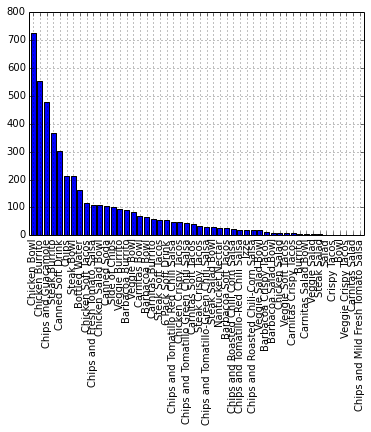

In [38]:
#Bar Chart of Item Name
items  = df.item_name.value_counts().plot(kind='bar')

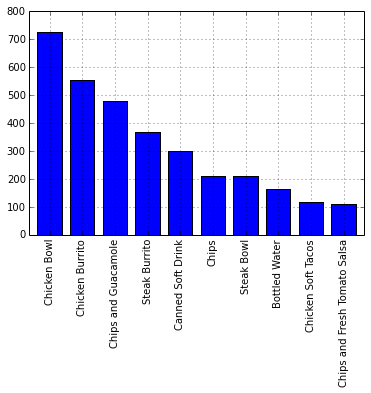

In [39]:
#Bar chart of top ten item names
items  = df.item_name.value_counts()[:10].plot(kind='bar')

In [15]:
#Value Counts of item name
df.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [41]:
#Combined order prices
orders = df.groupby('order_id').sum()
orders.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


In [42]:
#order stats
orders['item_price'].describe()

count    1834.000000
mean     18.811429
std      11.652512
min      10.080000
25%      12.572500
50%      16.200000
75%      21.960000
max      205.250000
Name: item_price, dtype: float64

In [57]:
descriptions = df.groupby(["item_name", "choice_description"])["order_id"].count().reset_index(name="count")

# descriptions = descriptions[descriptions['item_name'].str.contains("Chicken Bowl")]

descriptions = descriptions[descriptions['item_name'].str.contains("Canned Soda")]


descriptions.sort(['count'], ascending=False)

,item_name,choice_description,count
170,Canned Soda,[Coca Cola],26
173,Canned Soda,[Dr. Pepper],18
175,Canned Soda,[Sprite],17
174,Canned Soda,[Mountain Dew],15
171,Canned Soda,[Diet Coke],15
172,Canned Soda,[Diet Dr. Pepper],13


In [50]:
type(descriptions)

pandas.core.frame.DataFrame